In [1]:
# Import 3rd-party frameworks.

from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import time as tm
import json
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import gc
import os

In [2]:

import sys
sys.path.append('..')
from config import *

In [3]:
from Mike_NB_01 import *

In [4]:
file_id = "08_all"

table = np.load( os.path.join( Config['BinanceCandlesNumpy'], "table_" + file_id + ".npy") )
print("table: {}".format(table.shape))
table_markets = []
with open( os.path.join( Config['BinanceCandlesNumpy'], "reports_" + file_id + ".json"), "r") as f:
    reports = json.loads(f.read())
print(reports)



table: (329, 2751841, 12)
['ALICEUSDT: 2751841, 1684624 created. Success.', 'DOTUSDT: 2751841, 1385204 created. Success.', '1INCHUSDT: 2751841, 1569533 created. Success.', 'BTCUSDT: 2751841, 8065 created. Success.', 'ETHUSDT: 2751841, 8066 created. Success.', 'MATICUSDT: 2751841, 695830 created. Success.', 'BNBUSDT: 2751841, 18015 created. Success.', 'USDCUSDT: ', 'XRPUSDT: 2751841, 183492 created. Success.', 'ADAUSDT: 2751841, 158764 created. Success.', 'DOGEUSDT: 2751841, 795789 created. Success.', 'SOLUSDT: 2751841, 1374105 created. Success.', 'BUSDUSDT: 2751841, 905949 created. Success.', 'LTCUSDT: 2751841, 8066 created. Success.', 'SHIBUSDT: 2751841, 1765131 created. Success.', 'TRXUSDT: 2751841, 238412 created. Success.', 'AVAXUSDT: 2751841, 1434614 created. Success.', 'LINKUSDT: 2751841, 551890 created. Success.', 'ATOMUSDT: 2751841, 699490 created. Success.', 'XMRUSDT: 2751841, 634689 created. Success.', 'ETCUSDT: 2751841, 238712 created. Success.', 'UNIUSDT: 2751841, 1427204 c

In [ ]:
gc.collect()

In [19]:
print(np.min(table[:,:,11]), np.max(table[:,:,11]))
nTotal = table.shape[0] * table.shape[1]
nPrependedCandles = np.sum(table[:,:,11] == -1)
nCoincodexCandles = np.sum(table[:,:,11] == -2)
nInterpolatedCandles = np.sum(table[:,:,11] == -3)
nBinanceCandles = nTotal - nPrependedCandles - nCoincodexCandles - nInterpolatedCandles
print(nTotal, nPrependedCandles, nCoincodexCandles, nInterpolatedCandles, nBinanceCandles)


nan nan
905355689 518898375 149383 422715 385885216


([<matplotlib.patches.Wedge at 0x7f644675c790>,
 [Text(-0.2526717571127702, -1.0705872141761947, 'nBinanceCandles'),
  Text(0.9841766011599875, -0.49132109432546767, 'nCoincodexCandles'),
  Text(0.2536872393681524, 1.0703470393203158, 'nPrependedCandles'),
  Text(-1.0999988160849516, 0.001613880945073227, 'nInterpolatedCandles')],
 [Text(-0.13782095842514736, -0.5839566622779243, '42.6225%'),
  Text(0.5368236006327204, -0.2679933241775278, '0.0165%'),
  Text(0.13837485783717401, 0.5838256578110813, '57.3143%'),
  Text(-0.5999993542281554, 0.000880298697312669, '0.0467%')])

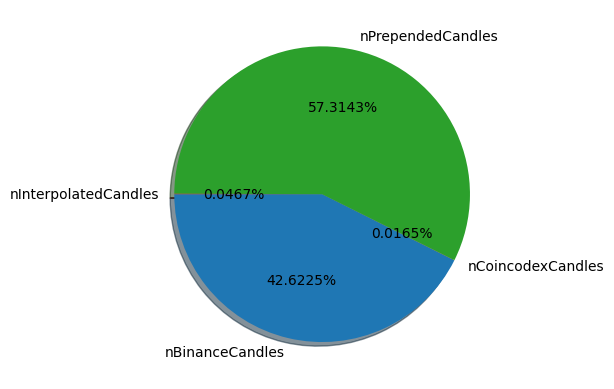

In [26]:
import matplotlib.pyplot as plt
labels = 'nBinanceCandles', 'nCoincodexCandles', 'nPrependedCandles', 'nInterpolatedCandles'
sizes = [nBinanceCandles, nCoincodexCandles, nPrependedCandles, nInterpolatedCandles]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.4f%%', shadow=True, startangle=0)

In [ ]:
market = 0
nLatest = 500
p = table[market, -nLatest:, 4]
ap = table[market, -nLatest:, 7] / (table[market, -nLatest:, 5] + 1e-9)
ap2 = table[market, -nLatest:, 10] / (table[market, -nLatest:, 9] + 1e-9)
rate2 = p/ (ap2+1e-9)
series = [
    (ap2, "TakerBuyQuoteV / TakerBuyBaseV", "brown"),
    # (ap, "QuoteV / BaseV", "orange"),
    # (p, "closing Price", "b"),
]
ShowSingle("Market {}".format(market), series)

- I hoped this would make a good average price.
- Disappointed it has lots of missing values. ------ market 0.

In [ ]:
market = 1
nLatest = 500
p = table[market, -nLatest:, 4]
ap = table[market, -nLatest:, 7] / (table[market, -nLatest:, 5] + 1e-9)
ap2 = table[market, -nLatest:, 10] / (table[market, -nLatest:, 9] + 1e-9)
rate2 = p/ (ap2+1e-9)
series = [
    (ap2, "TakerBuyQuoteV / TakerBuyBaseV", "brown"),
    # (ap, "QuoteV / BaseV", "orange"),
    # (p, "closing Price", "b"),
]
ShowSingle("Market {}".format(market), series)

- The average price v1 (coming from QuoteV / BaseV) is almost the same to the average price v2 (coming from TakerBuyQuoteV / TakerBuyBaseV).
- Statistically there is no difference between them.

In [ ]:
market = 1
nLatest = 500
p = table[market, -nLatest:, 4]
ap = table[market, -nLatest:, 7] / (table[market, -nLatest:, 5] + 1e-9)
ap2 = table[market, -nLatest:, 10] / (table[market, -nLatest:, 9] + 1e-9)
rate2 = p/ (ap2+1e-9)
series = [
    (ap2, "TakerBuyQuoteV / TakerBuyBaseV", "brown"),
    (ap, "QuoteV / BaseV", "orange"),
    # (p, "closing Price", "b"),
]
ShowSingle("Market {}".format(market), series)

- The average price v1 (coming from QuoteV / BaseV) is almost the same to the average price v2 (coming from TakerBuyQuoteV / TakerBuyBaseV).
- Statistically there is no difference between them.

In [ ]:
market = 0
nLatest = 500
p = table[market, -nLatest:, 4]
ap = table[market, -nLatest:, 7] / (table[market, -nLatest:, 5] + 1e-9)
ap2 = table[market, -nLatest:, 10] / (table[market, -nLatest:, 9] + 1e-9)
rate2 = p/ (ap2+1e-9)
series = [
    (ap2, "TakerBuyQuoteV / TakerBuyBaseV", "brown"),
    (ap, "QuoteV / BaseV", "orange"),
    # (p, "closing Price", "b"),
]
ShowSingle("Market {}".format(market), series)

- But, for Market 0 again, average price v1 and v2 differ much.

In [ ]:
market = 2
nLatest = 500
p = table[market, -nLatest:, 4]
ap = table[market, -nLatest:, 7] / (table[market, -nLatest:, 5] + 1e-9)
ap2 = table[market, -nLatest:, 10] / (table[market, -nLatest:, 9] + 1e-9)
rate2 = p/ (ap2+1e-9)
series = [
    (ap2, "TakerBuyQuoteV / TakerBuyBaseV", "brown"),
    (ap, "QuoteV / BaseV", "orange"),
    # (p, "closing Price", "b"),
]
ShowSingle("Market {}".format(market), series)

For Market 2, they differ much.

In [ ]:
market = 3
nLatest = 500
p = table[market, -nLatest:, 4]
ap = table[market, -nLatest:, 7] / (table[market, -nLatest:, 5] + 1e-9)
ap2 = table[market, -nLatest:, 10] / (table[market, -nLatest:, 9] + 1e-9)
rate2 = p/ (ap2+1e-9)
series = [
    (ap2, "TakerBuyQuoteV / TakerBuyBaseV", "brown"),
    (ap, "QuoteV / BaseV", "orange"),
    # (p, "closing Price", "b"),
]
ShowSingle("Market {}".format(market), series)

- For Market 3, they seem to be exactly the same.

So, average price v1 and v2 are not very reliable.
- They must be the same, in theory.
- But they differ in reality candles, due to missing (represented by zero) average prices, not due to value differences.
- The missing average prices come from missing (represented by zero) QuoteV or TakerBuyQuoteV.
- If QuoteV is missing, BaseV is also missing, and vice versa.

The reason:
- Not all one-minute candles have volume, although they always have prices.
- Prices without volume is possible, because a market price is inherited from previous candle if there is no transaction in the current candle.
- Let's confirm this.

In [ ]:
market = 0
qv = table[market, -nLatest:, 7]
index = qv == 0 # np.logical_and( table[market, -nLatest:, 5] == 0, table[market, -nLatest:, 10] == 0 )
op = table[market, -nLatest:, 1][index]
hp = table[market, -nLatest:, 2][index]
lp = table[market, -nLatest:, 3][index]
cp = table[market, -nLatest:, 4][index]
series = [
    (op, "opening price at zero-volume candel", "b"), 
    (hp, "hight price at zero-volume candel", "g"), 
    (lp, "low price at zero-volume candel", "yellow"), 
    (cp, "closing price zero-volume candel", "r"), 
]
ShowSingle("OHLC prices at candles where QuoteV is zero", series)

- OHLC prices are exactly the same with each other, if QuoteV is zero in a candle.
- It means no transactions took place in the candle, and the prices are inherited from previous candles. (edited)

In [ ]:
qv = table[market, -nLatest:, 7]
index = qv == 0 # np.logical_and( table[market, -nLatest:, 5] == 0, table[market, -nLatest:, 10] == 0 )
op = table[market, -nLatest-1:-1, 1][index]
hp = table[market, -nLatest-1:-1, 2][index]
lp = table[market, -nLatest-1:-1, 3][index]
cp = table[market, -nLatest-1:-1, 4][index]
cp_org = table[market, -nLatest:, 4][index]
series = [
    (op, "opening price at the previous candle of zero-volume candel", "b"), 
    (hp, "hight price at the previous candle of zero-volume candel", "g"), 
    (lp, "low price at the previous candle of zero-volume candel", "yellow"), 
    (cp, "closing price at the previous candle of zero-volume candel", "r"), 
    (cp_org, "closing price at zero-voluem candles", "c")
]
ShowSingle("OHLC prices at candles where QuoteV is zero, are the same and inherited from previous candles closing pice", series)

Wow, we are right.
Only the red line is masked by the cyan line completely.
- It means the closing price at zero-volume candles are inherited from the closing (so, the latest) price of the previous candle.
- All OHLC prices at zero-volume candles are the same to each other.
- QuoteV and BaseV are zero or non-zero simultaneously.
- TakerBuyQuoteV and TakerBuyBaseV) are zero or non-zero simultaneously.
- If QuoteV (or BaseV) is zero, then TakerBuy volumes are aso zero. But not vice versa, because the former is part of the latter.
- TakerBuy volumes are much more frequently zero.
- Zero volume means there was no transaction in the candle. Hence the price inheritance.

In [ ]:
market = 0
nLatest = 500
p = table[market, -nLatest:, 4]
ap = table[market, -nLatest:, 7] / (table[market, -nLatest:, 5] + 1e-9)
ap2 = table[market, -nLatest:, 10] / (table[market, -nLatest:, 9] + 1e-9)
rate2 = p/ (ap2+1e-9)
series = [
    (ap2, "TakerBuyQuoteV / TakerBuyBaseV", "brown"),
    (ap, "QuoteV / BaseV", "orange"),
    (p, "closing Price", "b"),
]
ShowSingle("Market {}".format(market), series)

The closing price has no missing (zero) value, unlike the average price.
- This is because, at the candles that have no transactions
the closing price, and all other prices, are inherited from the previous candle
- while volumes cannot be inherited from the previous candles, and set to zero (missing).
- zero volumes generates zero average prices. (average price = baseV / quoteV)

In [ ]:
market = 1
nLatest = 500
p = table[market, -nLatest:, 4]
ap = table[market, -nLatest:, 7] / (table[market, -nLatest:, 5] + 1e-9)
ap2 = table[market, -nLatest:, 10] / (table[market, -nLatest:, 9] + 1e-9)
rate2 = p/ (ap2+1e-9)
series = [
    (ap2, "TakerBuyQuoteV / TakerBuyBaseV", "brown"),
    (ap, "QuoteV / BaseV", "orange"),
    (p, "closing Price", "b"),
]
ShowSingle("Market {}".format(market), series)

So, the question is: The average price will be reliable if all candles have transactions (eq: if the market is busy) We can confirm it:
- Market 1 looks busy, and all candles have transaction(s).
- As we learned, if there is QuoteV (or BaseV), then there is TakerBuy volumes.
- In a busy market, the average price always exist, and the plot shows the average price is almost the same to closing price.

In [ ]:
market = 2
nLatest = 500
p = table[market, -nLatest:, 4]
ap = table[market, -nLatest:, 7] / (table[market, -nLatest:, 5] + 1e-9)
ap2 = table[market, -nLatest:, 10] / (table[market, -nLatest:, 9] + 1e-9)
rate2 = p/ (ap2+1e-9)
series = [
    (ap2, "TakerBuyQuoteV / TakerBuyBaseV", "brown"),
    (ap, "QuoteV / BaseV", "orange"),
    (p, "closing Price", "b"),
]
ShowSingle("Market {}".format(market), series)

Market 2 is similar to Market 0, and has missing average prices (missing volumes, or candles that have no transactions)

In [ ]:
market = 3
nLatest = 500
p = table[market, -nLatest:, 4]
ap = table[market, -nLatest:, 7] / (table[market, -nLatest:, 5] + 1e-9)
ap2 = table[market, -nLatest:, 10] / (table[market, -nLatest:, 9] + 1e-9)
rate2 = p/ (ap2+1e-9)
series = [
    (ap2, "TakerBuyQuoteV / TakerBuyBaseV", "brown"),
    (ap, "QuoteV / BaseV", "orange"),
    (p, "closing Price", "b"),
]
ShowSingle("Market {}".format(market), series)

What's happening? Market 3 has the same plot with Market 1.

In [ ]:
market = 7
nLatest = 500
p = table[market, -nLatest:, 4]
ap = table[market, -nLatest:, 7] / (table[market, -nLatest:, 5] + 1e-9)
ap2 = table[market, -nLatest:, 10] / (table[market, -nLatest:, 9] + 1e-9)
rate2 = p/ (ap2+1e-9)
series = [
    (ap2, "TakerBuyQuoteV / TakerBuyBaseV", "brown"),
    (ap, "QuoteV / BaseV", "orange"),
    (p, "closing Price", "b"),
]
ShowSingle("Market {}".format(market), series)

Market 4, 5, and 7 give the same plot.
- WOW, only the shape is the same. The absolute values are different.
- It means their prices follow the same change.
- But Market 7 is independent: (It shows 2 candles that have no transaction, so no average prices) (edited)

In [ ]:
market = 0
op = table[market, -nLatest:, 1]
hp = table[market, -nLatest:, 2]
lp = table[market, -nLatest:, 3]
cp = table[market, -nLatest:, 4]
series = [
    (op, "opening price", "b"), (hp, "hight price", "g"), (lp, "low price", "yellow"), (cp, "closing price", "r"), 
]
ShowSingle("Market {}".format(market), series)

We now know we cannot rely on the average price, which is sometimes missing. The closing price is not missing.
- Closing price vs. OHL prices
- should we make a new average from OHLC prices?
- or, the closing price will do?

In [ ]:
market = 2
op = table[market, -nLatest:, 1]
hp = table[market, -nLatest:, 2]
lp = table[market, -nLatest:, 3]
cp = table[market, -nLatest:, 4]
series = [
    (op, "opening price", "b"), (hp, "hight price", "g"), (lp, "low price", "yellow"), (cp, "closing price", "r"), 
]
ShowSingle("Market {}".format(market), series)

- The closing price looks having less noise than high/low prices.
- It meets expectations. High/low prices are wilder and have more noise inherently than opening and closing price, which, unlike H/L prices, have a fixed time point.
- Then should we make average of the opening and closing prices?`

In [ ]:
market = 2
op = table[market, -nLatest:, 1]
hp = table[market, -nLatest:, 2]
lp = table[market, -nLatest:, 3]
cp = table[market, -nLatest:, 4]
series = [
    (op, "opening price", "b"), (cp, "closing price", "r"), 
]
ShowSingle("Market {}".format(market), series)

- Opening and Closing prices have similar degree of noise.
- Closing price is a bit more recent, at a microscopic viewpoint.
- The average of the two will have more noise.

Conclusion, for the Mozaic application:
- **Take opening time**, and get rid of closing time.
- **Take closing price**, and get rid of OHL prices. Don't get the average price of whatever.
- **Take QuoteV**. Missing (zero) values are good information, indicating that there candle was not busy with transactions.
- Take BaseV, only for the ease of neural compute, not for new information. It's actually redundant infomation.
- Take TakerBuyQuoteV. It shows who of taker and maker more wanted the transactions. New information.
- Take TakerBuyBaseV, only for the ease of neural compute. It's not new information.
- Take the last reserved attributes, which works as a flag that the candle is created by Mozaic.


7 of total 11 attributes of a candle are selected, for the sake of memory/compute saving.